In [1]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 	Gender
# 	0: male		1: female	2: unsure
#    ----------------------------------------------------------------------
# 	Race
# 0: Caucasian		1: African-American		2: Asian
# ----------------------------------------------------------------------
# 	Age (5 ranges)
# 0: 0-3	 1: 4-19		2: 20-39		3: 40-69		4: 70+
# NOTE: raw txt file has emotion labels 1-indexed, I am shifting to zero-indexing
emotion_lookup = {
    0: "Surprise",
    1: "Fear",
    2: "Disgust",
    3: "Happiness",
    4: "Sadness",
    5: "Anger",
    6: "Neutral"
}

race_lookup = {
    0: "Caucasian",
    1: "African-American",
    2: "Asian"
}

gender_lookup = {
    0: "Male",
    1: "Female",
    2: "Unsure"
}

age_lookup = {
    0: "0-3",
    1: "4-19",
    2: "20-39",
    3: "40-69",
    4: "70+"
}

In [3]:
# Construct dataframe for train/test data attributes
data_dir = Path("../data")
raf_dir = data_dir / "RAF"
train_dir = raf_dir / "aligned_train"
test_dir = raf_dir / "aligned_test"
annot_dir = raf_dir / "manual"
labels_file = raf_dir / "list_partition_label.txt"
df = pd.read_csv(labels_file, sep=" ", header=None)
df.columns = ["Name", "Emotion"]
df["Path"] = df["Name"].apply(lambda x: os.path.join(str(train_dir), x.replace(".jpg","_aligned.jpg")) if ("train" in x) else os.path.join(str(test_dir), x.replace(".jpg","_aligned.jpg")))
df["Split"] = df["Name"].apply(lambda x: "Train" if ("train" in x) else "Test")
gender = []
race = []
age = []
for i,r in df.iterrows():
    annot_file = os.path.join(str(annot_dir), "{}_manu_attri.txt".format(r["Name"].replace(".jpg","")))
    with open(annot_file, "r") as f:
        lines = f.readlines()
        gender.append(int(lines[5]))
        race.append(int(lines[6]))
        age.append(int(lines[7]))
df["Gender"] = gender
df["Race"] = race
df["Age"] = age
# NOTE: raw txt file has emotion labels 1-indexed, I am shifting to zero-indexing
df["Emotion"] = df["Emotion"] - 1
df["EmotionLabel"] = df["Emotion"].apply(lambda x: emotion_lookup[x])
df["RaceLabel"] = df["Race"].apply(lambda x: race_lookup[x])
df["GenderLabel"] = df["Gender"].apply(lambda x: gender_lookup[x])
df["AgeLabel"] = df["Age"].apply(lambda x: age_lookup[x])
df_train = df[df["Split"]=="Train"]
df_test = df[df["Split"]=="Test"]
assert len(df) == len(df_train) + len(df_test)

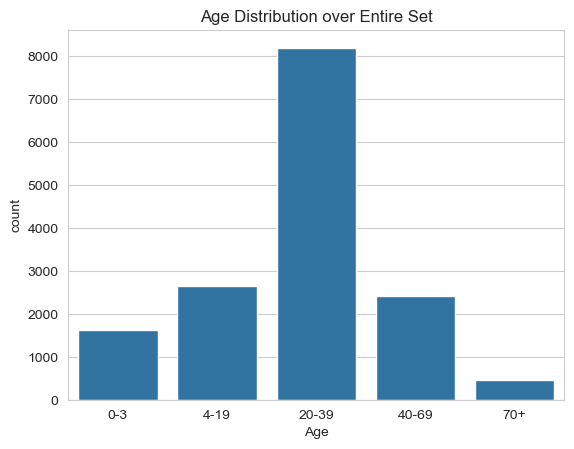

In [42]:
fig, ax = plt.subplots()
ax.set_title("Age Distribution over Entire Set")
ax.set_xlabel("Age")
ax.set_ylabel("Count")
sns.countplot(x="Age", data=df, ax=ax, color="C0")
ax.set_xticklabels([age_lookup[i] for i in range(5)])
plt.show()

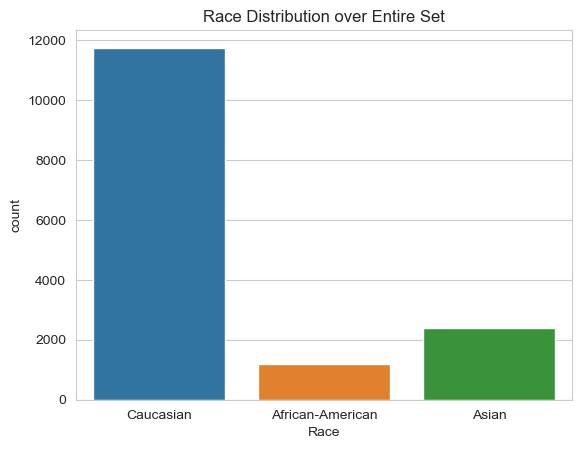

In [5]:
# race
fig, ax = plt.subplots()
ax.set_title("Race Distribution over Entire Set")
ax.set_xlabel("Race")
ax.set_ylabel("Count")
sns.countplot(x="Race", data=df, ax=ax)
ax.set_xticklabels([race_lookup[i] for i in range(3)])
plt.show()

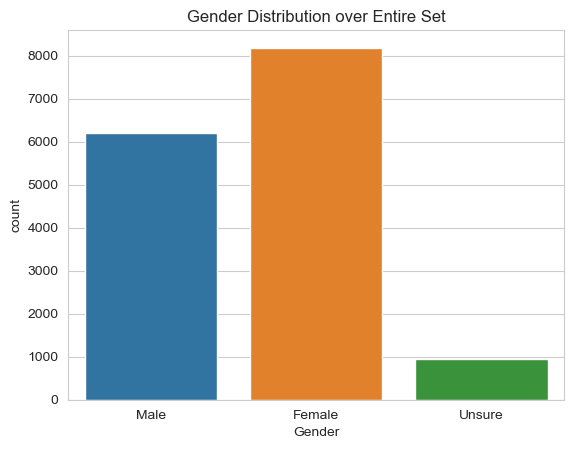

In [6]:
# gender
fig, ax = plt.subplots()
ax.set_title("Gender Distribution over Entire Set")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
sns.countplot(x="Gender", data=df, ax=ax)
ax.set_xticklabels([gender_lookup[i] for i in range(3)])
plt.show()

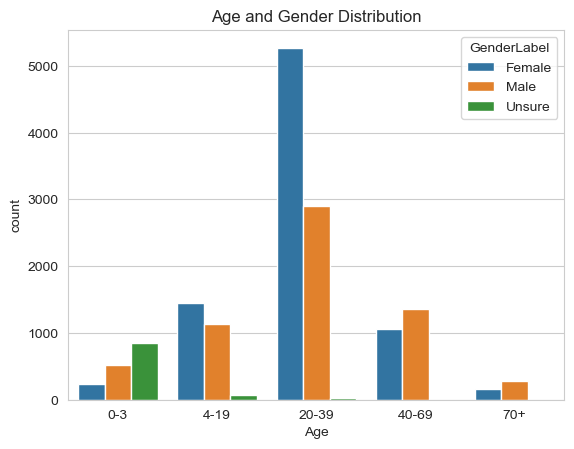

In [49]:
# plot n of each age and gender combination
fig, ax = plt.subplots()
ax.set_title("Age and Gender Distribution")
ax.set_xlabel("Age")
ax.set_ylabel("Count")
sns.countplot(x="Age", hue="GenderLabel", data=df, ax=ax)
ax.set_xticklabels([age_lookup[i] for i in range(5)])
plt.show()

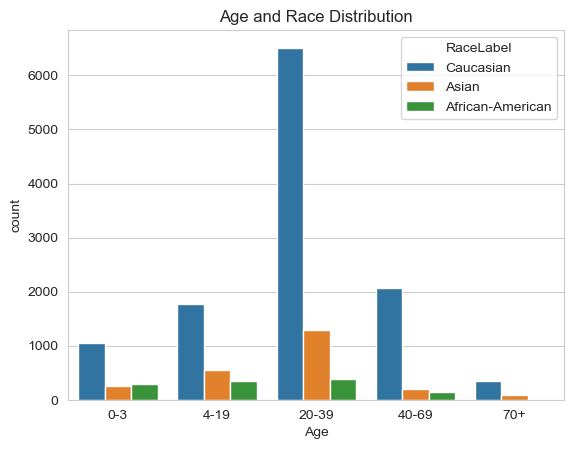

In [51]:
# plot n of each age and gender combination
fig, ax = plt.subplots()
ax.set_title("Age and Race Distribution")
ax.set_xlabel("Age")
ax.set_ylabel("Count")
sns.countplot(x="Age", hue="RaceLabel", data=df, ax=ax)
ax.set_xticklabels([age_lookup[i] for i in range(5)])
plt.show()

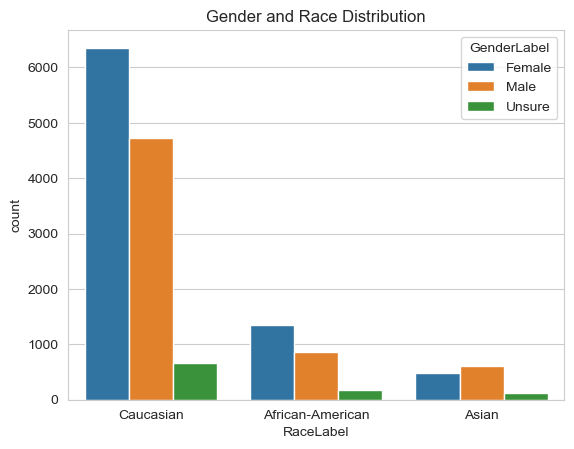

In [50]:
# plot n of each age and gender combination
fig, ax = plt.subplots()
ax.set_title("Gender and Race Distribution")
ax.set_xlabel("Age")
ax.set_ylabel("Count")
sns.countplot(x="RaceLabel", hue="GenderLabel", data=df, ax=ax)
ax.set_xticklabels([race_lookup[i] for i in range(3)])
plt.show()

In [8]:
df.head()
# Gender, Race, Age

,Name,Emotion,Path,Split,Gender,Race,Age,EmotionLabel,RaceLabel,GenderLabel,AgeLabel
0,train_00001.jpg,4,../data/RAF/aligned_train/train_00001_aligned.jpg,Train,1,0,2,Sadness,Caucasian,Female,20-39
1,train_00002.jpg,4,../data/RAF/aligned_train/train_00002_aligned.jpg,Train,1,0,2,Sadness,Caucasian,Female,20-39
2,train_00003.jpg,3,../data/RAF/aligned_train/train_00003_aligned.jpg,Train,1,2,2,Happiness,Asian,Female,20-39
3,train_00004.jpg,3,../data/RAF/aligned_train/train_00004_aligned.jpg,Train,1,0,2,Happiness,Caucasian,Female,20-39
4,train_00005.jpg,4,../data/RAF/aligned_train/train_00005_aligned.jpg,Train,1,2,1,Sadness,Asian,Female,4-19


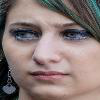

In [9]:
img_path = df.iloc[0]["Path"]
# show
from PIL import Image
img = Image.open(img_path)
img

In [10]:
df[df["Age"]==1].sample(5)

,Name,Emotion,Path,Split,Gender,Race,Age,EmotionLabel,RaceLabel,GenderLabel,AgeLabel
666,train_00667.jpg,3,../data/RAF/aligned_train/train_00667_aligned.jpg,Train,1,0,1,Happiness,Caucasian,Female,4-19
2525,train_02526.jpg,3,../data/RAF/aligned_train/train_02526_aligned.jpg,Train,0,0,1,Happiness,Caucasian,Male,4-19
7265,train_07266.jpg,5,../data/RAF/aligned_train/train_07266_aligned.jpg,Train,2,0,1,Anger,Caucasian,Unsure,4-19
10186,train_10187.jpg,6,../data/RAF/aligned_train/train_10187_aligned.jpg,Train,1,2,1,Neutral,Asian,Female,4-19
9156,train_09157.jpg,3,../data/RAF/aligned_train/train_09157_aligned.jpg,Train,0,0,1,Happiness,Caucasian,Male,4-19


/var/folders/_c/4nyz6w6s1cq61c91lh5vxq5m0000gn/T/ipykernel_57861/2950799079.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  img_path = df[df["Age"]==i][df["Gender"]==2].sample(1, random_state=random_state)["Path"].values[0]


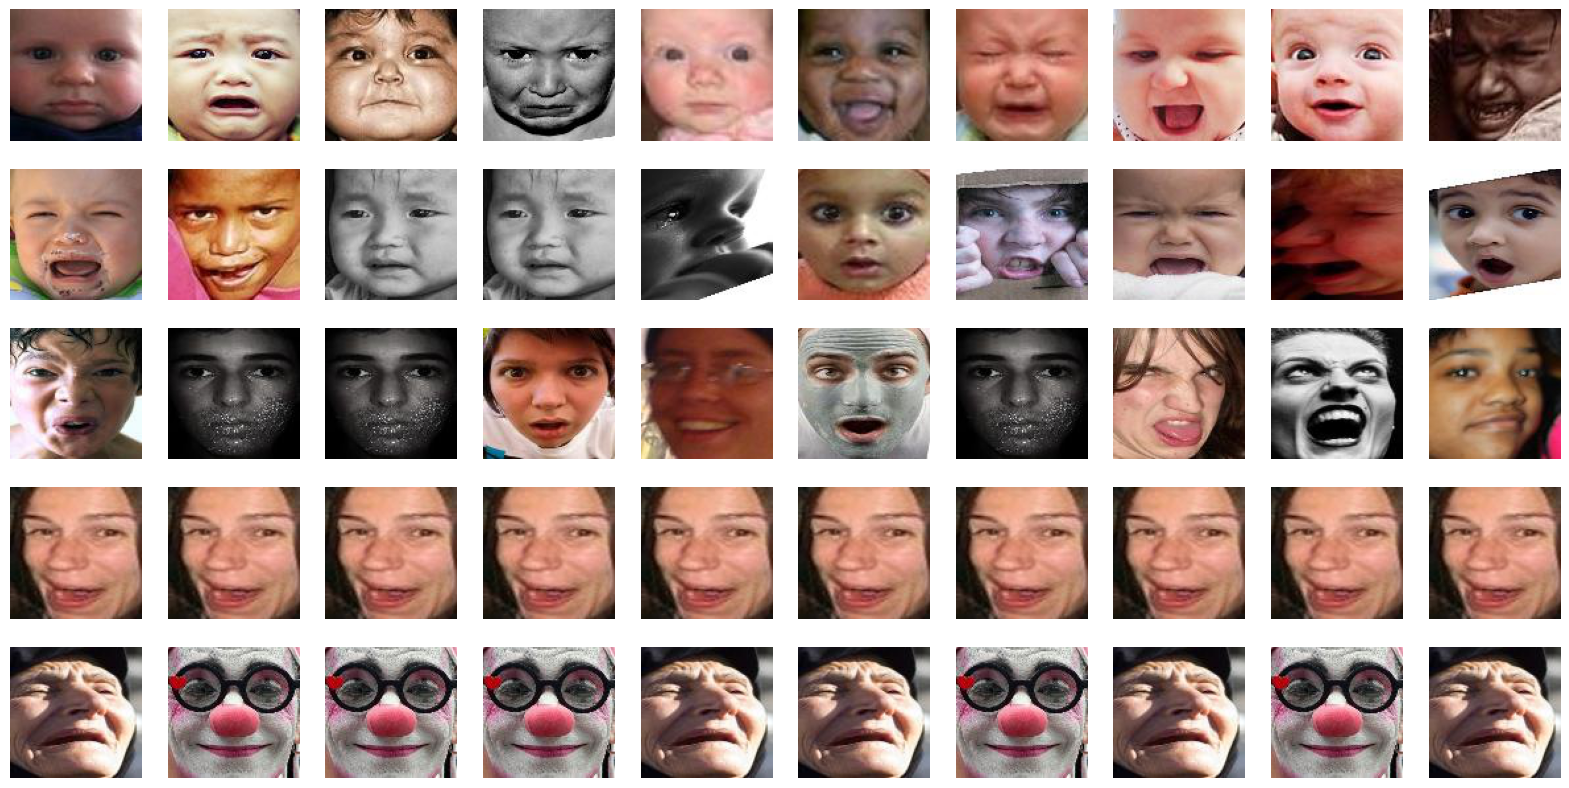

In [11]:
from numpy.random import RandomState

# df[df["Age"]==1].sample(5)
# plot a few examples for every age group
random_state = RandomState(0)
num_show = 5
fig, ax = plt.subplots(nrows=5, ncols=num_show*2, figsize=(num_show*2*2,5*2))
for i in range(5):
    for j in range(num_show*2):
        img_path = df[df["Age"]==i][df["Gender"]==2].sample(1, random_state=random_state)["Path"].values[0]
        img = Image.open(img_path)
        ax[i,j].imshow(img)
        # ax[i,j].set_title(img_path.split("/")[-1])
        ax[i,j].axis("off")
plt.show()

/var/folders/_c/4nyz6w6s1cq61c91lh5vxq5m0000gn/T/ipykernel_57861/4083291187.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  img_path = df[df["Age"]==i][df["Gender"]==(j < num_show)].sample(1, random_state=random_state)["Path"].values[0]


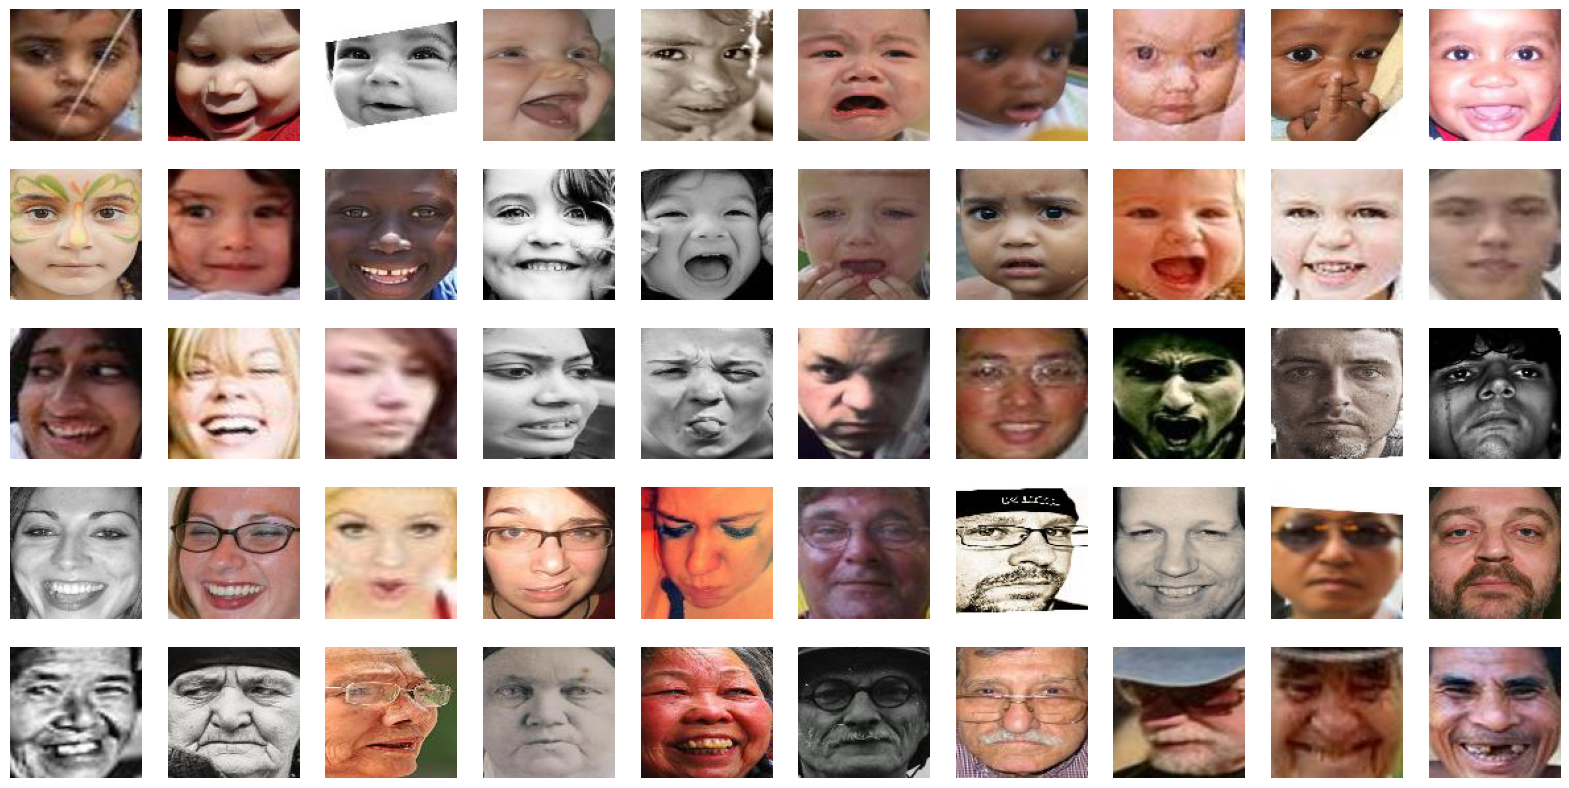

In [12]:
from numpy.random import RandomState

# df[df["Age"]==1].sample(5)
# plot a few examples for every age group
random_state = RandomState(0)
num_show = 5
fig, ax = plt.subplots(nrows=5, ncols=num_show*2, figsize=(num_show*2*2,5*2))
for i in range(5):
    for j in range(num_show*2):
        img_path = df[df["Age"]==i][df["Gender"]==(j < num_show)].sample(1, random_state=random_state)["Path"].values[0]
        img = Image.open(img_path)
        ax[i,j].imshow(img)
        # ax[i,j].set_title(img_path.split("/")[-1])
        ax[i,j].axis("off")
plt.show()

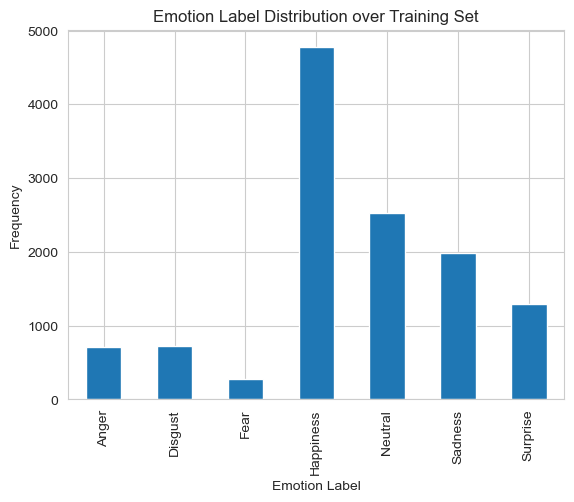

In [13]:
# Distribution of emotion labels
fig, ax = plt.subplots()
ax.set_title("Emotion Label Distribution over Training Set")
ax.set_xlabel("Emotion Label")
ax.set_ylabel("Frequency")
df_train["EmotionLabel"].value_counts().sort_index().plot(ax=ax, kind='bar')
plt.show()

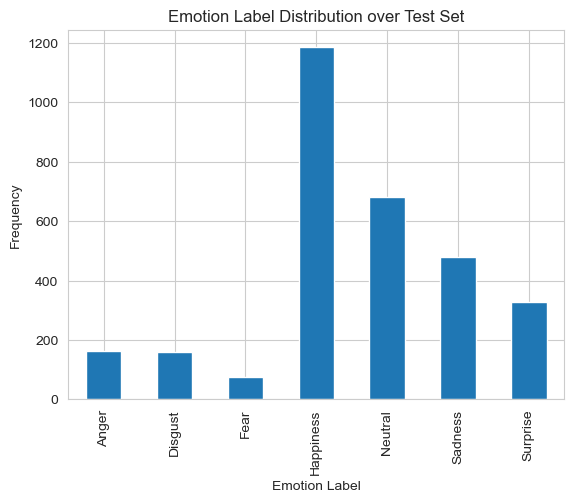

In [14]:
fig, ax = plt.subplots()
ax.set_title("Emotion Label Distribution over Test Set")
ax.set_xlabel("Emotion Label")
ax.set_ylabel("Frequency")
df_test["EmotionLabel"].value_counts().sort_index().plot(ax=ax, kind='bar')
plt.show()

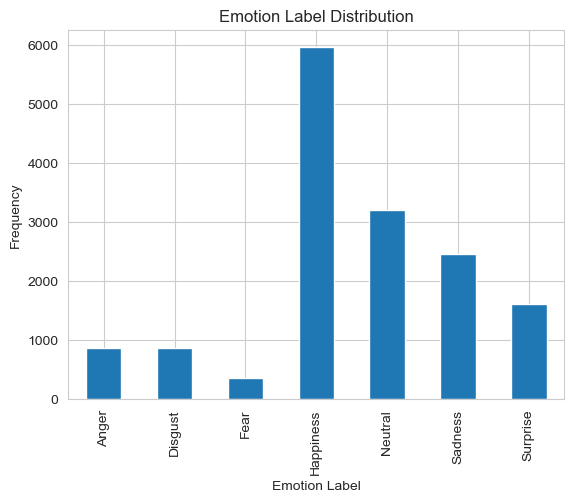

In [35]:
fig, ax = plt.subplots()
ax.set_title("Emotion Label Distribution")
ax.set_xlabel("Emotion Label")
ax.set_ylabel("Frequency")
df["EmotionLabel"].value_counts().sort_index().plot(ax=ax, kind='bar')
plt.show()

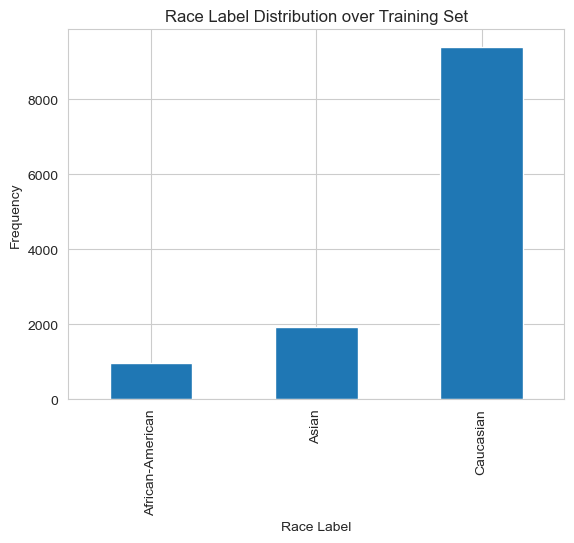

In [15]:
# Distribution of race labels
fig, ax = plt.subplots()
ax.set_title("Race Label Distribution over Training Set")
ax.set_xlabel("Race Label")
ax.set_ylabel("Frequency")
df_train["RaceLabel"].value_counts().sort_index().plot(ax=ax, kind='bar')
plt.show()

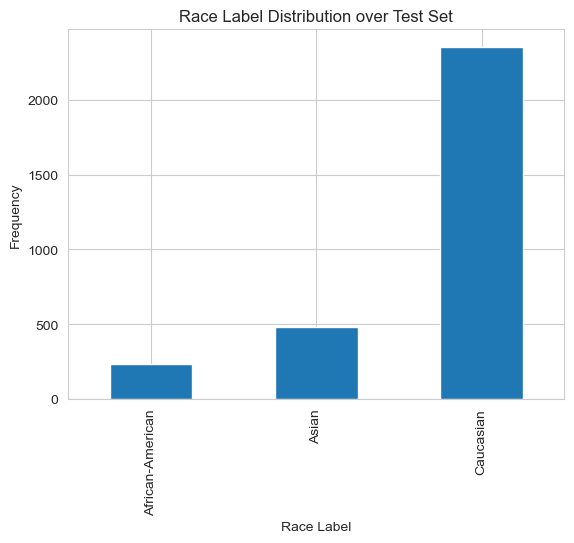

In [16]:
fig, ax = plt.subplots()
ax.set_title("Race Label Distribution over Test Set")
ax.set_xlabel("Race Label")
ax.set_ylabel("Frequency")
df_test["RaceLabel"].value_counts().sort_index().plot(ax=ax, kind='bar')
plt.show()

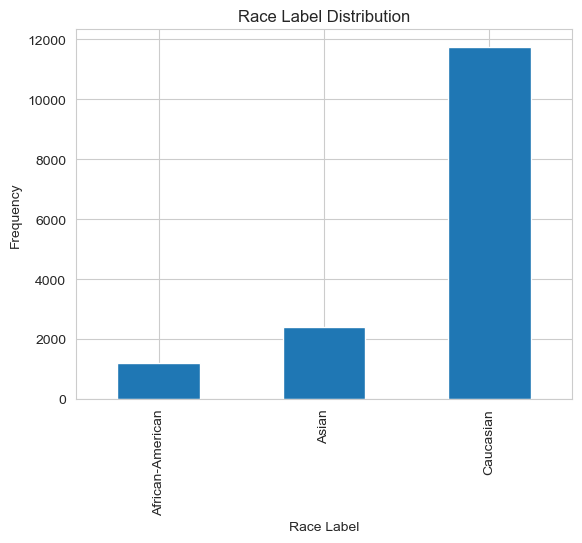

In [33]:
fig, ax = plt.subplots()
ax.set_title("Race Label Distribution")
ax.set_xlabel("Race Label")
ax.set_ylabel("Frequency")
df["RaceLabel"].value_counts().sort_index().plot(ax=ax, kind='bar')
plt.show()

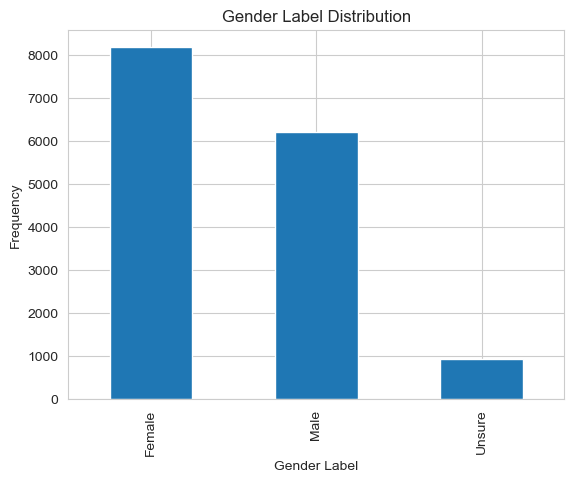

In [45]:
fig, ax = plt.subplots()
ax.set_title("Gender Label Distribution")
ax.set_xlabel("Gender Label")
ax.set_ylabel("Frequency")
df["GenderLabel"].value_counts().sort_index().plot(ax=ax, kind='bar')
plt.show()

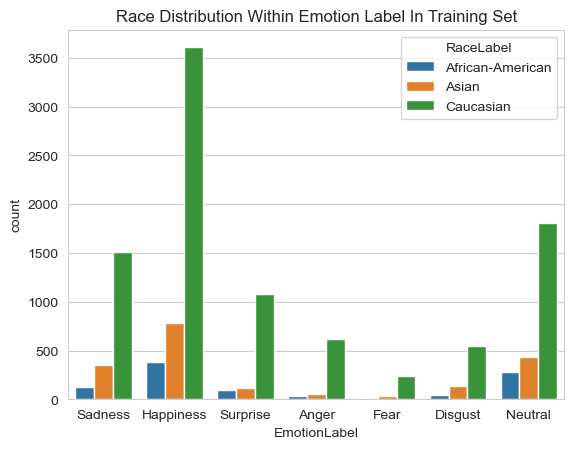

In [17]:
# Distribution of race within each emotion label
race_label_order = ["African-American", "Asian", "Caucasian"]
fig, ax = plt.subplots()
ax.set_title("Race Distribution Within Emotion Label In Training Set")
sns.countplot(data=df_train, x="EmotionLabel", hue="RaceLabel", hue_order=race_label_order, ax=ax)
plt.show()

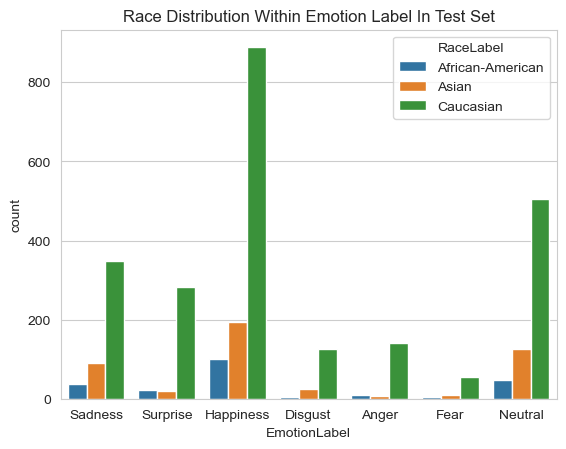

In [18]:
fig, ax = plt.subplots()
ax.set_title("Race Distribution Within Emotion Label In Test Set")
sns.countplot(data=df_test, x="EmotionLabel", hue="RaceLabel", hue_order=race_label_order, ax=ax)
plt.show()

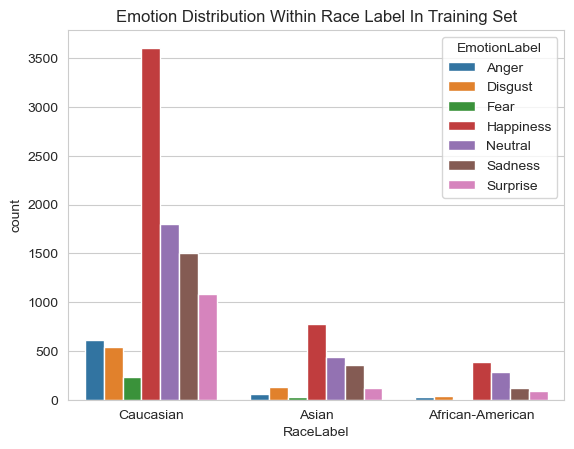

In [19]:
# Distribution of emotion within each race label
emotion_label_order = [emotion_lookup[i] for i in range(7)]
emotion_label_order.sort()
fig, ax = plt.subplots()
ax.set_title("Emotion Distribution Within Race Label In Training Set")
sns.countplot(data=df_train, x="RaceLabel", hue="EmotionLabel", hue_order=emotion_label_order, ax=ax)
plt.show()

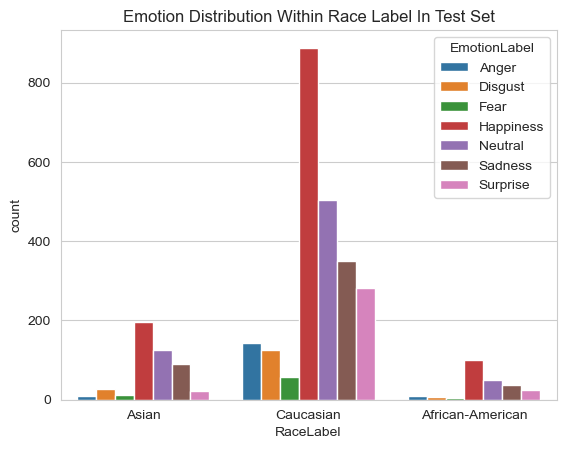

In [20]:
fig, ax = plt.subplots()
ax.set_title("Emotion Distribution Within Race Label In Test Set")
sns.countplot(data=df_test, x="RaceLabel", hue="EmotionLabel", hue_order=emotion_label_order, ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Emotion Distribution Within Race Label In Test Set")
sns.countplot(data=df, x="RaceLabel", hue="EmotionLabel", hue_order=emotion_label_order, ax=ax)
plt.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'order'

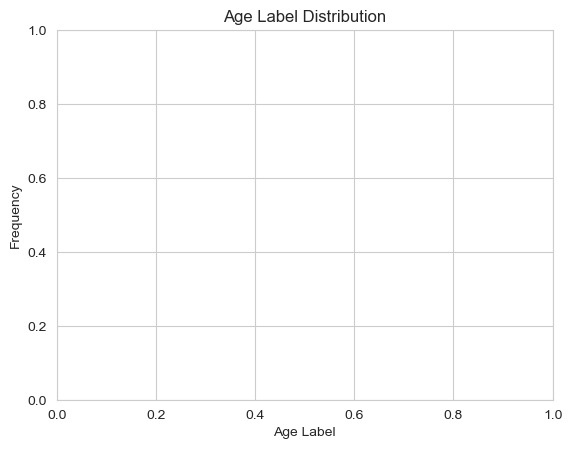

In [39]:
fig, ax = plt.subplots()
ax.set_title("Age Label Distribution")
ax.set_xlabel("Age Label")
ax.set_ylabel("Frequency")
df["AgeLabel"].value_counts().plot(ax=ax, kind='bar')
plt.show()

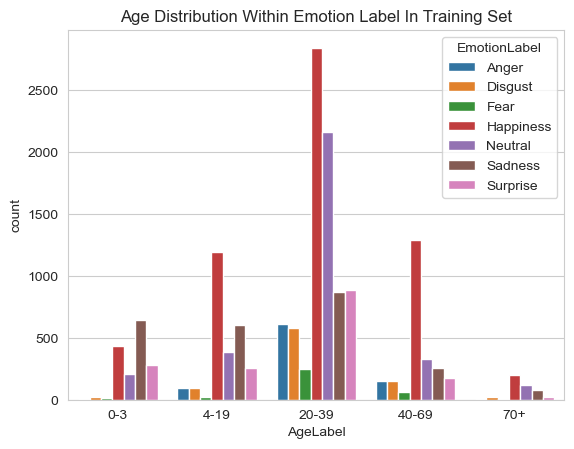

In [21]:
# Distribution of gender within each emotion label
age_label_order = [age_lookup[i] for i in range(5)]
fig, ax = plt.subplots()
ax.set_title("Age Distribution Within Emotion Label In Training Set")
sns.countplot(data=df, x="AgeLabel", hue="EmotionLabel", hue_order=emotion_label_order, ax=ax, order=age_label_order)
plt.show()

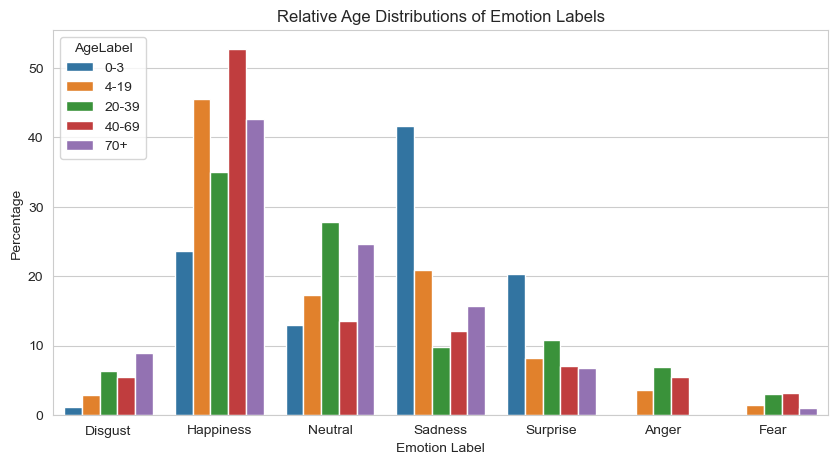

In [22]:
# normalize total number of each emotion label to 100% to show the relative age distributions
df_test_age_emotion_count = df_test.groupby(["AgeLabel", "EmotionLabel"]).size().reset_index(name="Count")
df_test_age_emotion_count["Percentage"] = df_test_age_emotion_count.groupby("AgeLabel", group_keys=False)["Count"].apply(lambda x: x / x.sum() * 100)
df_test_age_emotion_count = df_test_age_emotion_count.sort_values(by=["AgeLabel", "EmotionLabel"])

# Distribution of gender within each emotion label
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x="EmotionLabel", y="Percentage", hue="AgeLabel", data=df_test_age_emotion_count, ax=ax, hue_order=age_label_order)
ax.set_title("Relative Age Distributions of Emotion Labels")
ax.set_xlabel("Emotion Label")
ax.set_ylabel("Percentage")
plt.show()

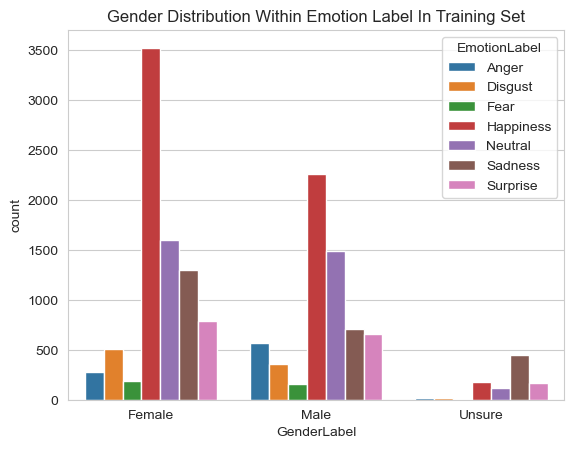

In [24]:
# Distribution of gender within each emotion label
gender_label_order = [gender_lookup[i] for i in range(3)]
gender_label_order.sort()
fig, ax = plt.subplots()
ax.set_title("Gender Distribution Within Emotion Label In Training Set")
sns.countplot(data=df, x="GenderLabel", hue="EmotionLabel", hue_order=emotion_label_order, ax=ax)
plt.show()

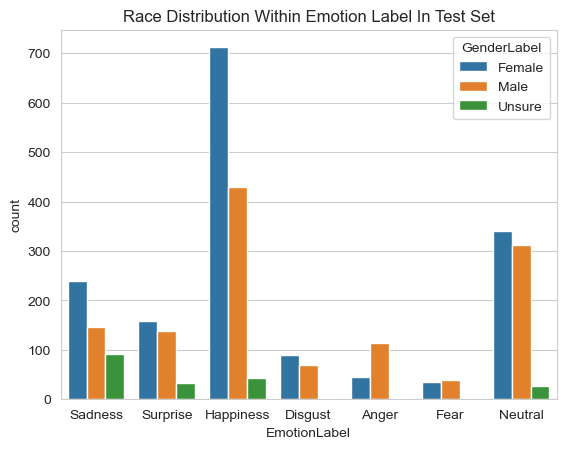

In [25]:
fig, ax = plt.subplots()
ax.set_title("Race Distribution Within Emotion Label In Test Set")
sns.countplot(data=df_test, x="EmotionLabel", hue="GenderLabel", hue_order=gender_label_order, ax=ax)
plt.show()

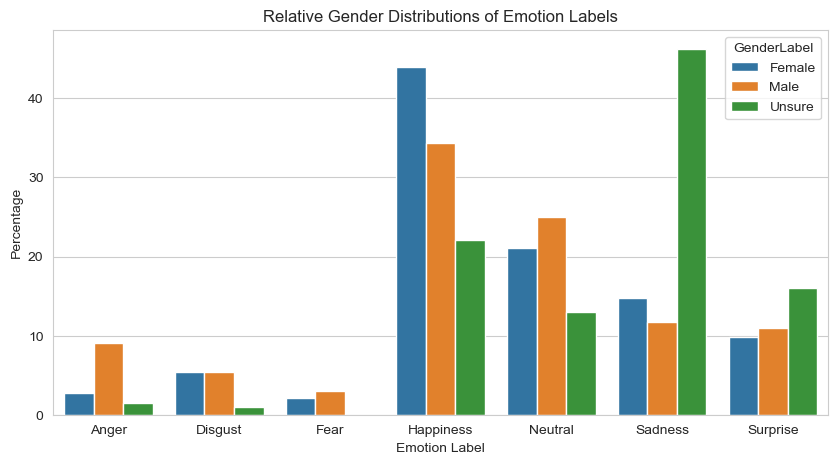

In [26]:
# normalize total number of each emotion label to 100% to show the relative gender distributions
df_test_gender_emotion_count = df_test.groupby(["GenderLabel", "EmotionLabel"]).size().reset_index(name="Count")
df_test_gender_emotion_count["Percentage"] = df_test_gender_emotion_count.groupby("GenderLabel", group_keys=False)["Count"].apply(lambda x: x / x.sum() * 100)
df_test_gender_emotion_count = df_test_gender_emotion_count.sort_values(by=["GenderLabel", "EmotionLabel"])

# plot the relative gender distributions
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x="EmotionLabel", y="Percentage", hue="GenderLabel", data=df_test_gender_emotion_count, ax=ax)
ax.set_title("Relative Gender Distributions of Emotion Labels")
ax.set_xlabel("Emotion Label")
ax.set_ylabel("Percentage")
plt.show()

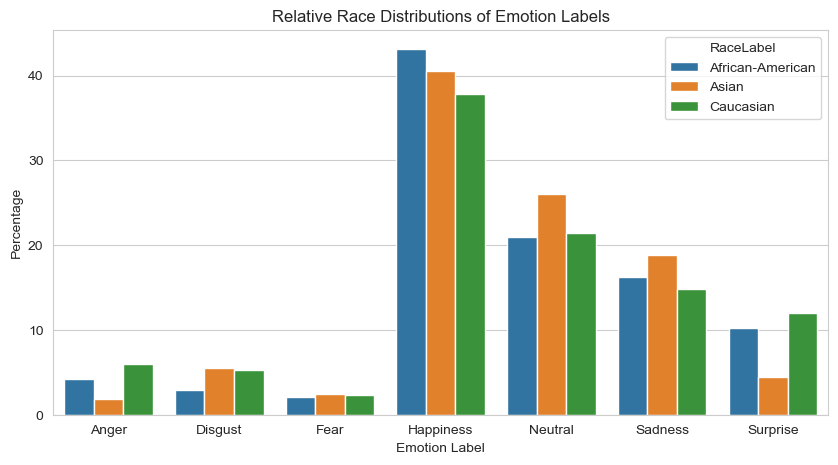

In [31]:
# normalize total number of each emotion label to 100% to show the relative gender distributions
df_test_gender_emotion_count = df_test.groupby(["RaceLabel", "EmotionLabel"]).size().reset_index(name="Count")
df_test_gender_emotion_count["Percentage"] = df_test_gender_emotion_count.groupby("RaceLabel", group_keys=False)["Count"].apply(lambda x: x / x.sum() * 100)
df_test_gender_emotion_count = df_test_gender_emotion_count.sort_values(by=["RaceLabel", "EmotionLabel"])

# plot the relative gender distributions
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x="EmotionLabel", y="Percentage", hue="RaceLabel", data=df_test_gender_emotion_count, ax=ax)
ax.set_title("Relative Race Distributions of Emotion Labels")
ax.set_xlabel("Emotion Label")
ax.set_ylabel("Percentage")
plt.show()

In [27]:
df.head()

,Name,Emotion,Path,Split,Gender,Race,Age,EmotionLabel,RaceLabel,GenderLabel,AgeLabel
0,train_00001.jpg,4,../data/RAF/aligned_train/train_00001_aligned.jpg,Train,1,0,2,Sadness,Caucasian,Female,20-39
1,train_00002.jpg,4,../data/RAF/aligned_train/train_00002_aligned.jpg,Train,1,0,2,Sadness,Caucasian,Female,20-39
2,train_00003.jpg,3,../data/RAF/aligned_train/train_00003_aligned.jpg,Train,1,2,2,Happiness,Asian,Female,20-39
3,train_00004.jpg,3,../data/RAF/aligned_train/train_00004_aligned.jpg,Train,1,0,2,Happiness,Caucasian,Female,20-39
4,train_00005.jpg,4,../data/RAF/aligned_train/train_00005_aligned.jpg,Train,1,2,1,Sadness,Asian,Female,4-19


## Splits

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Validation split
df_train_sp, df_val_sp = train_test_split(df_train, test_size=0.2, random_state=5)

In [30]:
# Write to file
splits_dir = raf_dir / "splits"
os.makedirs(splits_dir, exist_ok=True)
df_train_sp.to_csv(os.path.join(str(splits_dir), "train_files.csv"))
df_val_sp.to_csv(os.path.join(str(splits_dir), "val_files.csv"))
df_test.to_csv(os.path.join(str(splits_dir), "test_files.csv"))
# original train
df_train.to_csv(os.path.join(str(splits_dir), "original_train_files.csv"))